# Pandas intro class 04

Objective:
- Understand and learn Exploratory Data Analysis (EDA)
- Data visulization 101


## EDA recommended steps

Data inspection - Data cleaning - Data wrangling - Data visualization

- inspect all datasets and metadata definition
- understand data types
- understand/ask the right question
- check for missing values, take appropriate action
- check for duplicates, take appropriate action
- check data distribution (outliers, anormaly values, check assumption, etc.)
- check correlation (with target variable, or multicolinearity in inputs)
- take care of outliers and generate transformations if needed
- data wrangling for your problem
- feature engineering
- visualization (along the way of all steps above)
#### Advanced topics:
- sampling: random, up-sample, down-sample
- bi-variate / multi-variate views
- time series

## Data visulization 101

Tools:
- `matplotlib`: https://matplotlib.org/gallery/index.html
- `seaborn`: https://seaborn.pydata.org/
- `pandas` also have lots of built-in methods: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization
- `plotly`: https://plotly.com/python/getting-started/?utm_source=mailchimp-jan-2015&utm_medium=email&utm_campaign=generalemail-jan2015&utm_term=bubble-chart

In [ ]:
# install packages required in this class in your virtual env
! conda install matplotlib seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)

%matplotlib inline

## Recommended resourse: [Data EDA cheat-sheet](https://github.com/cmawer/pycon-2017-eda-tutorial/blob/master/EDA-cheat-sheet.md)

### Another cheat-sheet in image format:
![img](https://www.analyticsvidhya.com/wp-content/uploads/2015/06/infographics-final.jpg)

## EDA example: World Happiness Data
https://www.kaggle.com/unsdsn/world-happiness

- Relatively smalle dataset for exploration
- Easy to explore with lots of flexibility
- Dystopis: https://worldhappiness.report/faq/#what-is-dystopia

In [2]:
rename_dict = {'Overall rank':'Rank',
               'Happiness Rank':'Rank',
               'Happiness.Rank':'Rank',
               'Happiness Score':'Score',
               'Happiness.Score':'Score',
               'Country or region':'Country',
               'Economy..GDP.per.Capita.':'GDP_PC',
               'GDP per capita':'GDP_PC',
               'Economy (GDP per Capita)':'GDP_PC',
               'Social support':'Family',
               'Health (Life Expectancy)':'Health',
               'Healthy life expectancy':'Health',
               'Health..Life.Expectancy.':'Health',
               'Freedom to make life choices':'Freedom',
               'Trust (Government Corruption)':'Trust',
               'Trust..Government.Corruption.':'Trust',
               'Perceptions of corruption':'Trust',
               'Dystopia Residual':'Dystopia',
               'Dystopia.Residual':'Dystopia'
              }

In [55]:
# read in all different years of data
df_list = []

for year in range(2015, 2020):
    df = pd.read_csv(f'data/world-happiness/{year}.csv')
    # comment the following two lines for metadata inspection
    df.rename(columns=rename_dict, inplace=True)
    df['year'] = int(year)
    df_list.append(df)

In [56]:
df_all = pd.concat(df_list)
df_all.sort_values(['Country','year'], inplace=True)
df_all.groupby('year')['Country'].count()

year
2015    158
2016    157
2017    155
2018    156
2019    156
Name: Country, dtype: int64

In [5]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 152 to 145
Data columns (total 17 columns):
Country                      782 non-null object
Dystopia                     470 non-null float64
Family                       782 non-null float64
Freedom                      782 non-null float64
GDP_PC                       782 non-null float64
Generosity                   782 non-null float64
Health                       782 non-null float64
Lower Confidence Interval    157 non-null float64
Rank                         782 non-null int64
Region                       315 non-null object
Score                        782 non-null float64
Standard Error               158 non-null float64
Trust                        781 non-null float64
Upper Confidence Interval    157 non-null float64
Whisker.high                 155 non-null float64
Whisker.low                  155 non-null float64
year                         782 non-null int64
dtypes: float64(13), int64(2), object(2)
memory u

In [6]:
df_all.head(10)

,Country,Dystopia,Family,Freedom,GDP_PC,Generosity,Health,Lower Confidence Interval,Rank,Region,Score,Standard Error,Trust,Upper Confidence Interval,Whisker.high,Whisker.low,year
152,Afghanistan,1.952100,0.302850,0.234140,0.319820,0.365100,0.303350,NaN,153,Southern Asia,3.575,0.03084,0.097190,NaN,NaN,NaN,2015
153,Afghanistan,2.145580,0.110370,0.164300,0.382270,0.312680,0.173440,3.288,154,Southern Asia,3.360,NaN,0.071120,3.432,NaN,NaN,2016
140,Afghanistan,2.150801,0.581543,0.106180,0.401477,0.311871,0.180747,NaN,141,NaN,3.794,NaN,0.061158,NaN,3.873661,3.714338,2017
144,Afghanistan,NaN,0.537000,0.085000,0.332000,0.191000,0.255000,NaN,145,NaN,3.632,NaN,0.036000,NaN,NaN,NaN,2018
153,Afghanistan,NaN,0.517000,0.000000,0.350000,0.158000,0.361000,NaN,154,NaN,3.203,NaN,0.025000,NaN,NaN,NaN,2019
94,Albania,1.898940,0.804340,0.357330,0.878670,0.142720,0.813250,NaN,95,Central and Eastern Europe,4.959,0.05013,0.064130,NaN,NaN,NaN,2015
108,Albania,1.928160,0.501630,0.318660,0.955300,0.168400,0.730070,4.546,109,Central and Eastern Europe,4.655,NaN,0.053010,4.764,NaN,NaN,2016
108,Albania,1.490442,0.803685,0.381499,0.996193,0.201313,0.731160,NaN,109,NaN,4.644,NaN,0.039864,NaN,4.752464,4.535536,2017
111,Albania,NaN,0.817000,0.419000,0.916000,0.149000,0.790000,NaN,112,NaN,4.586,NaN,0.032000,NaN,NaN,NaN,2018
106,Albania,NaN,0.848000,0.383000,0.947000,0.178000,0.874000,NaN,107,NaN,4.719,NaN,0.027000,NaN,NaN,NaN,2019


In [7]:
df_2015 = pd.read_csv('data/world-happiness/2015.csv')
df_2016 = pd.read_csv('data/world-happiness/2016.csv')

In [8]:
# generate region mapping dict
region_2015 = dict(zip(df_2015['Country'], df_2015['Region']))
# region_dict2 = df[['Country','Region']].set_index('Country').T.to_dict('records')[0]
# region_2015 == region_dict2
region_2016 = dict(zip(df_2016['Country'], df_2016['Region']))
region = {**region_2015, **region_2016} #region_dict_2016 ** dictionary unpack to key and value

In [82]:
region

{'Afghanistan': 'Southern Asia',
 'Albania': 'Central and Eastern Europe',
 'Algeria': 'Middle East and Northern Africa',
 'Angola': 'Sub-Saharan Africa',
 'Argentina': 'Latin America and Caribbean',
 'Armenia': 'Central and Eastern Europe',
 'Australia': 'Australia and New Zealand',
 'Austria': 'Western Europe',
 'Azerbaijan': 'Central and Eastern Europe',
 'Bahrain': 'Middle East and Northern Africa',
 'Bangladesh': 'Southern Asia',
 'Belarus': 'Central and Eastern Europe',
 'Belgium': 'Western Europe',
 'Belize': 'Latin America and Caribbean',
 'Benin': 'Sub-Saharan Africa',
 'Bhutan': 'Southern Asia',
 'Bolivia': 'Latin America and Caribbean',
 'Bosnia and Herzegovina': 'Central and Eastern Europe',
 'Botswana': 'Sub-Saharan Africa',
 'Brazil': 'Latin America and Caribbean',
 'Bulgaria': 'Central and Eastern Europe',
 'Burkina Faso': 'Sub-Saharan Africa',
 'Burundi': 'Sub-Saharan Africa',
 'Cambodia': 'Southeastern Asia',
 'Cameroon': 'Sub-Saharan Africa',
 'Canada': 'North America

In [9]:
# alternative way to combine dicts
region_dict2 = region_2015.copy()
region_dict2.update(region_2016)
region == region_dict2

True

In [10]:
# fill regions based on country
df_all['Region'] = df_all['Country'].map(region)

In [80]:
df_all[df_all['Region'].isna()]

AttributeError: 'Series' object has no attribute 'isna'

In [11]:
cols_to_keep = ['Country', 'Region', 'year', 'Rank', 'Score', 'GDP_PC', 'Family', 'Health',
                'Freedom', 'Trust', 'Generosity', 'Dystopia']
df_all_final = df_all[cols_to_keep].copy()
df_all_final.columns = df_all_final.columns.str.lower()
df_all_final.to_csv('data/world-happiness/combined.csv', index=False)

In [12]:
df_all_final[df_all_final['country'].isin(['China','United States'])]

,country,region,year,rank,score,gdp_pc,family,health,freedom,trust,generosity,dystopia
83,China,Eastern Asia,2015,84,5.140,0.890120,0.946750,0.816580,0.516970,0.027810,0.081850,1.860400
82,China,Eastern Asia,2016,83,5.245,1.027800,0.793810,0.735610,0.440120,0.027450,0.049590,2.170870
78,China,Eastern Asia,2017,79,5.273,1.081166,1.160837,0.741416,0.472788,0.022794,0.028807,1.764939
85,China,Eastern Asia,2018,86,5.246,0.989000,1.142000,0.799000,0.597000,0.103000,0.029000,NaN
92,China,Eastern Asia,2019,93,5.191,1.029000,1.125000,0.893000,0.521000,0.100000,0.058000,NaN
14,United States,North America,2015,15,7.119,1.394510,1.247110,0.861790,0.546040,0.158900,0.401050,2.510110
12,United States,North America,2016,13,7.104,1.507960,1.047820,0.779000,0.481630,0.148680,0.410770,2.727820
13,United States,North America,2017,14,6.993,1.546259,1.419921,0.774287,0.505741,0.135639,0.392579,2.218113
17,United States,North America,2018,18,6.886,1.398000,1.471000,0.819000,0.547000,0.133000,0.291000,NaN
18,United States,North America,2019,19,6.892,1.433000,1.457000,0.874000,0.454000,0.128000,0.280000,NaN


In [13]:
features = ['gdp_pc','family','health','freedom','generosity','trust']
targets = ['score']

df_2019 = df_all_final[df_all_final['year']==2019].copy()

In [14]:
df_2019.isna().mean()

AttributeError: 'DataFrame' object has no attribute 'isna'

In [15]:
df_2019[df_2019['region'].isna()]

AttributeError: 'Series' object has no attribute 'isna'

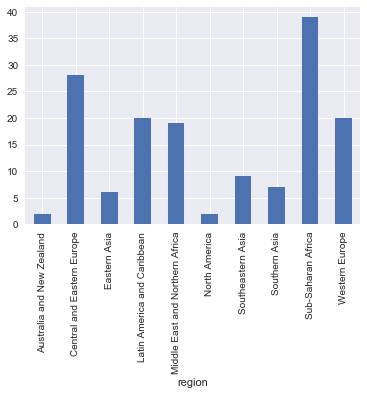

In [16]:
df_2019.groupby('region')['country'].count().plot(kind='bar')

In [17]:
df_means = df_2019.groupby('region')[features+targets].mean()

In [18]:
df_means

,gdp_pc,family,health,freedom,generosity,trust,score
region,,,,,,,
Australia and New Zealand,1.337500,1.552500,1.031000,0.571000,0.331000,0.335000,7.267500
Central and Eastern Europe,1.022429,1.340393,0.808500,0.357964,0.141214,0.062750,5.571786
Eastern Asia,1.235167,1.333500,0.953333,0.372167,0.172833,0.119667,5.688833
Latin America and Caribbean,0.908950,1.332850,0.816800,0.438500,0.142600,0.074850,5.942550
Middle East and Northern Africa,1.059053,1.148684,0.751053,0.317947,0.153474,0.105000,5.237000
North America,1.399000,1.481000,0.956500,0.519000,0.282500,0.218000,7.085000
Southeastern Asia,0.930000,1.246444,0.745333,0.543778,0.301778,0.123444,5.273667
Southern Asia,0.650286,0.986857,0.617000,0.386286,0.234714,0.093429,4.526857
Sub-Saharan Africa,0.447231,0.916103,0.407026,0.336205,0.185641,0.092641,4.294513


In [19]:
enumerate()

TypeError: Required argument 'iterable' (pos 1) not found

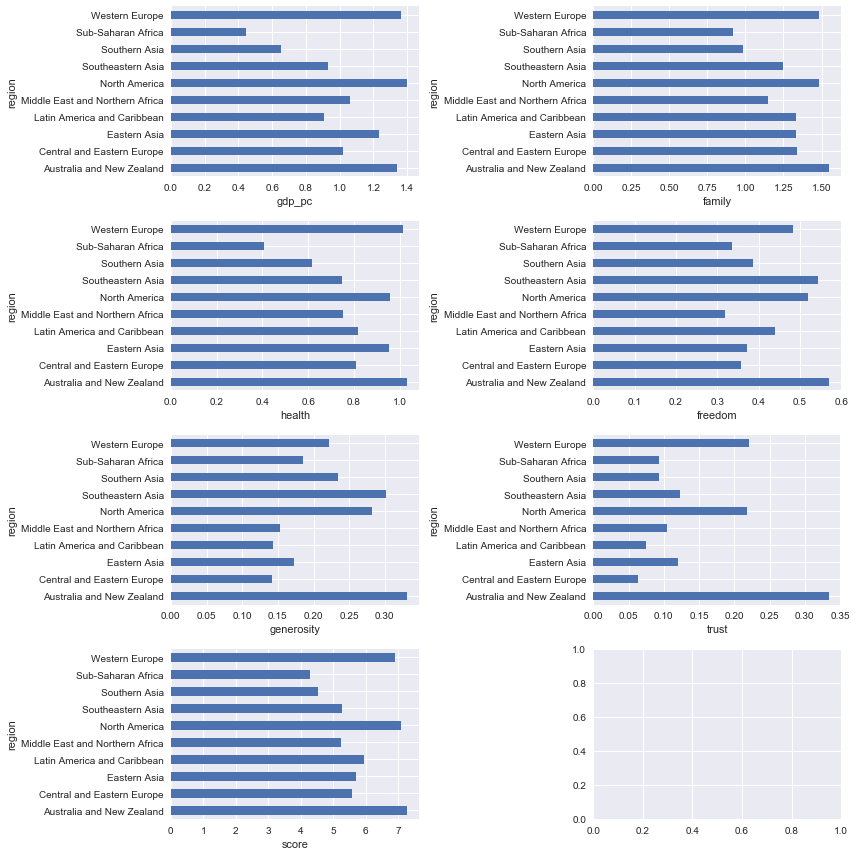

In [20]:
fig, axs = plt.subplots(4, 2, figsize=(12,12))
for i, ax in enumerate(axs.flat):
    try:
        df_means.loc[:, df_means.columns[i]].plot(kind='barh', ax=ax)
        ax.set(xlabel=df_means.columns[i])
    except:
        pass
fig.tight_layout()

[Text(0, 0, 'Southern Asia'),
 Text(0, 0, 'Central and Eastern Europe'),
 Text(0, 0, 'Middle East and Northern Africa'),
 Text(0, 0, 'Latin America and Caribbean'),
 Text(0, 0, 'Australia and New Zealand'),
 Text(0, 0, 'Western Europe'),
 Text(0, 0, 'Sub-Saharan Africa'),
 Text(0, 0, 'Southeastern Asia'),
 Text(0, 0, 'North America'),
 Text(0, 0, 'Eastern Asia')]

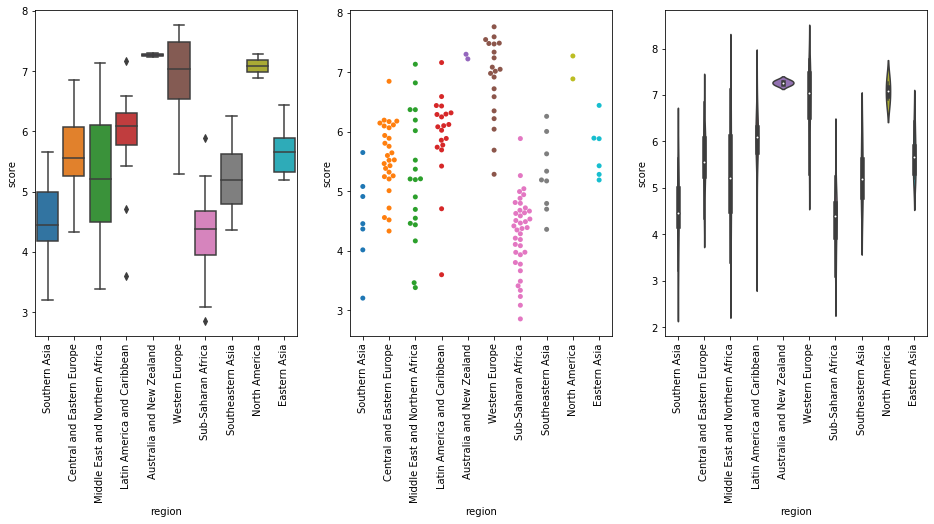

In [251]:
fig, axes = plt.subplots(1, 3, figsize=(16,6))

ax = sns.boxplot(x="region", y="score", data=df_2019, ax=axes[0])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax = sns.swarmplot(x="region", y="score", data=df_2019, ax=axes[1])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax = sns.violinplot(x="region", y="score", data=df_2019, ax=axes[2])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

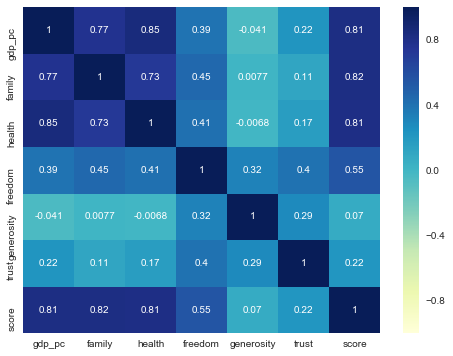

In [21]:
spearman_cormatrix= df_2019[features+targets].corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(spearman_cormatrix, annot=True, cmap="YlGnBu")

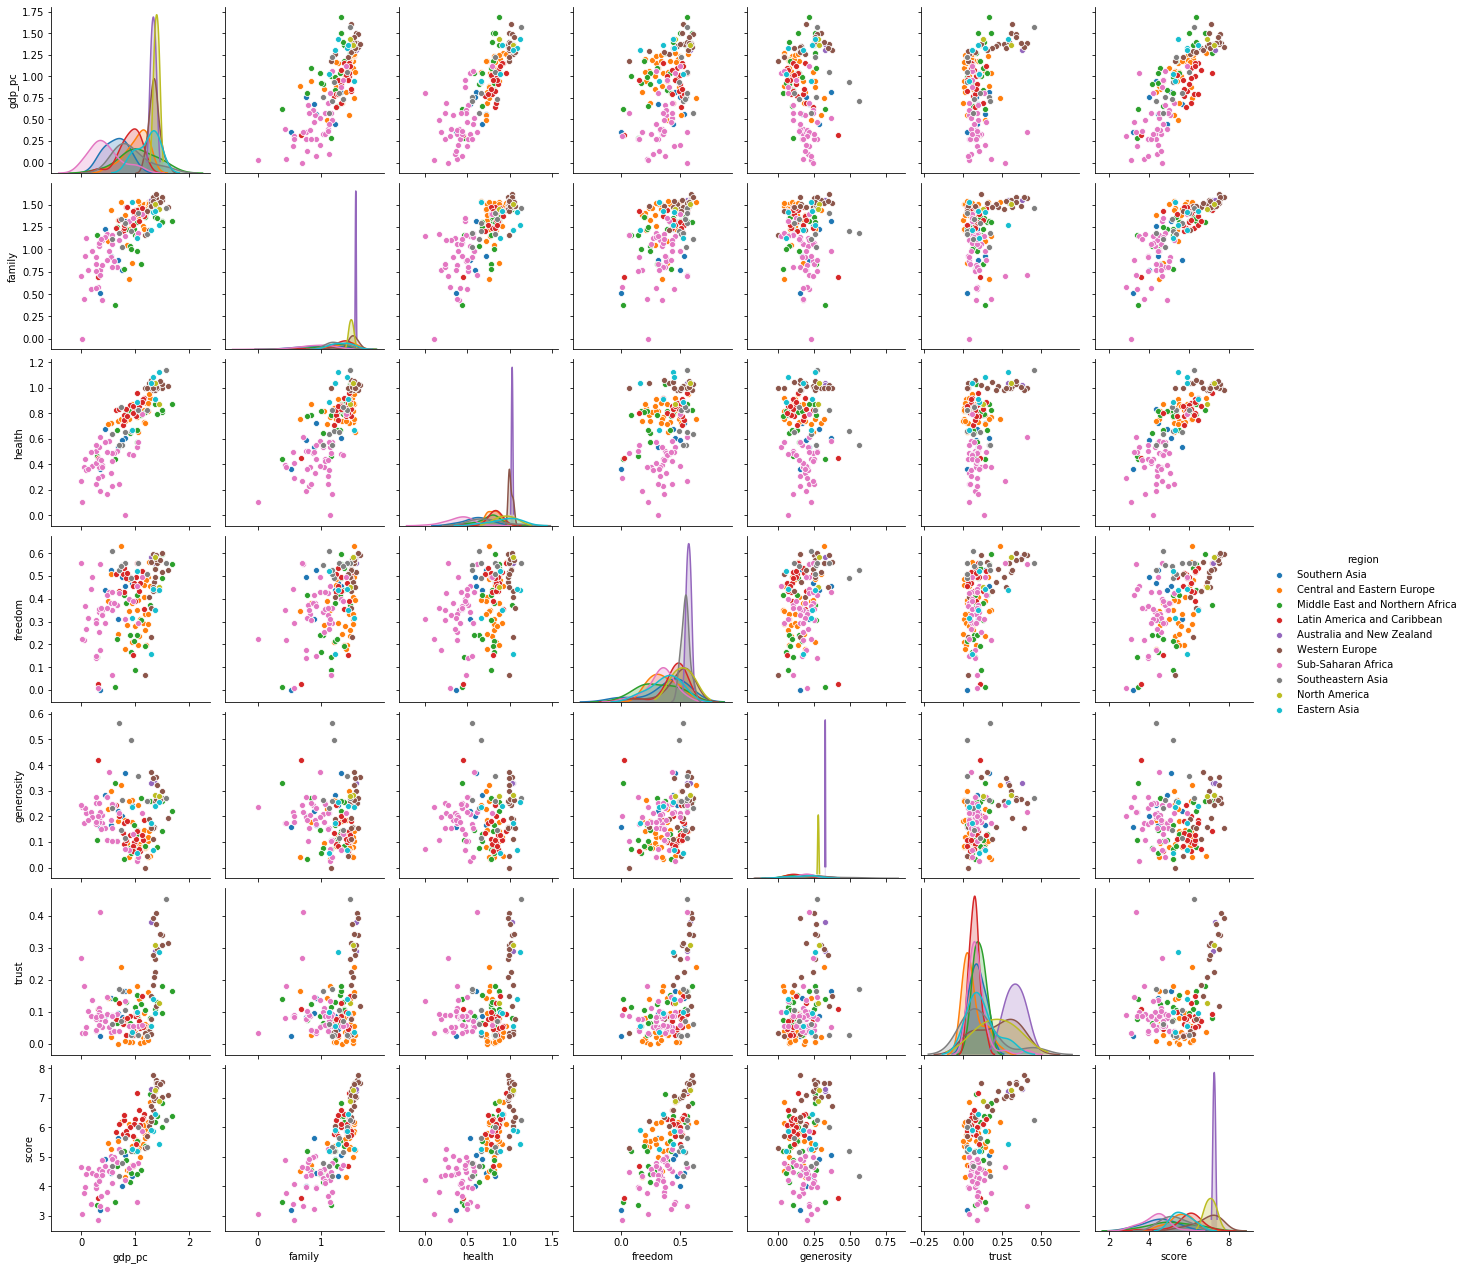

In [210]:
sns.pairplot(df_2019[features+targets+['region']], hue='region')

### Question: which countries changed the most in ranking in the past five years?

rank   -85
Name: Venezuela, dtype: int64
rank    53
Name: Benin, dtype: int64


(array([  1.,   0.,   2.,   3.,  19.,  39.,  64.,  26.,  12.,   4.]),
 array([-85. , -71.2, -57.4, -43.6, -29.8, -16. ,  -2.2,  11.6,  25.4,
         39.2,  53. ]),
 <a list of 10 Patch objects>)

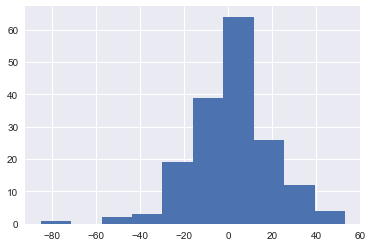

In [22]:
rank_change = pd.DataFrame(df_all_final.groupby('country')['rank'].nth(0) - df_all_final.groupby('country')['rank'].nth(-1))
print(rank_change.loc[rank_change['rank'].idxmin()])
print(rank_change.loc[rank_change['rank'].idxmax()])
plt.hist(rank_change['rank'])

score    0.0
Name: Djibouti, dtype: float64
score    2.103
Name: Venezuela, dtype: float64


(array([ 50.,  49.,  33.,  13.,  17.,   5.,   1.,   1.,   0.,   1.]),
 array([ 0.    ,  0.2103,  0.4206,  0.6309,  0.8412,  1.0515,  1.2618,
         1.4721,  1.6824,  1.8927,  2.103 ]),
 <a list of 10 Patch objects>)

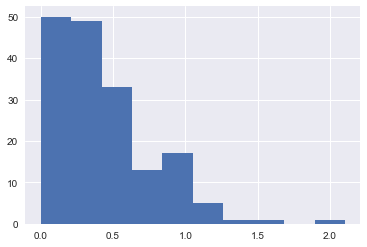

In [23]:
rank_change = pd.DataFrame(df_all_final.groupby('country')['score'].max() - df_all_final.groupby('country')['score'].min())

print(rank_change.loc[rank_change['score'].idxmin()])
print(rank_change.loc[rank_change['score'].idxmax()])

plt.hist(rank_change['score'])


In [24]:
change_top_10 = rank_change['score'].nlargest(10).index.values
change_top_10_df = df_all_final.loc[df_all_final['country'].isin(change_top_10)]
sns.lineplot(x='year', y='score', hue='country', data=change_top_10_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

AttributeError: module 'seaborn' has no attribute 'lineplot'

In [69]:
## Question: What countries are rich but happy? What countries are poor but unhappy? ##

# get these years average gdp , score and score rank by country
df_short = df_all.groupby(['Country']).agg({'Score':'mean','Rank':'mean','GDP_PC':'mean'}).round(2)

# rank the average
df_short['GDP_Rank'] = df_short['GDP_PC'].rank(ascending=False).round(0)

In [70]:
# get the diff of gdp rank and happiness rank
df_short['Rank_Diff'] = df_short['GDP_Rank'] - df_short['Rank']

In [71]:
df_short.head()

,Score,Rank,GDP_PC,GDP_Rank,Rank_Diff
Country,,,,,
Afghanistan,3.51,149.4,0.36,147.0,-2.4
Albania,4.71,106.4,0.94,90.0,-16.4
Algeria,5.67,66.2,1.01,80.0,13.8
Angola,3.87,140.0,0.80,110.0,-30.0
Argentina,6.46,31.2,1.11,62.0,30.8


In [75]:
# happy poor
df_short.sort('Rank_Diff')[-3:] 

C:\Users\zhang\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Score,Rank,GDP_PC,GDP_Rank,Rank_Diff
Country,,,,,
Nicaragua,6.03,46.80,0.68,121.0,74.20
Guatemala,6.34,33.60,0.81,108.0,74.40
Somalia,5.06,94.75,0.01,170.0,75.25


In [77]:
# unhappy rich
df_short.sort('Rank_Diff').reset_index().loc[0:2,:] 

C:\Users\zhang\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Country,Score,Rank,GDP_PC,GDP_Rank,Rank_Diff
0,Botswana,3.83,140.20,1.05,72.0,-68.20
1,"Hong Kong S.A.R., China",5.47,71.00,1.55,6.0,-65.00
2,Hong Kong,5.45,74.75,1.43,12.0,-62.75
